# Introduction to Data Science
## Homework 2

Student Name: Connor Concannon

Student Netid: cmc1204

# Part 1: Case study
- Read [this article](http://www.nytimes.com/2012/02/19/magazine/shopping-habits.html) in the New York Times.
- Use what we've learned in class and from the book to describe how one could set Target's problem up as a predictive modeling problem, such that they could have gotten the results that they did.  Formulate your solution as a proposed plan using our data science terminology.  Include all the aspects of the formulation that you see as relevant to solving the problem.  Be precise but concise.

Place your answer here!

# Part 2: Exploring data in the command line
For this part we will be using the data file located in `"advertising_events.csv"`. This file consists of records that pertain to some online advertising events on a given day. There are 4 comma separated columns in this order: `userid`, `timestamp`, `domain`, and `action`. These fields are of type `int`, `int`, `string`, and `int` respectively. Answer the following questions using Linux/Unix bash commands. All questions can be answered in one line (sometimes, with pipes)! Some questions will have many possible solutions. Don't forget that in IPython notebooks you must prefix all bash commands with an exclamation point, i.e. `"!command arguments"`.

[Hints: You can experiment with whatever you want in the notebook and then delete things to construct your answer later.  You can also use ssh to use the actual bash shell in your terminal and then just paste your answers here. Recall that once you enter the "!" then filename completion should work. Also, these are standard data exploration commands that are quick and easy to use in a terminal or in the notebook. We don't cover command line operations formally in this class, but these are worth learning (and thus are part of the HW). Be resourceful. Use whatever online cheat sheets or Stackoverflow to answer the question.]

1\. How many records (lines) are in this file (look up wc)?

In [3]:
# Place your code here
import os
import pandas as pd
from pandas import DataFrame
import seaborn as sns

%matplotlib inline
cwd = os.getcwd()
cwd

c = pd.read_csv('advertising_events.csv',names=['userid','timestamp','domain','action'])
c.head()
#c.describe()

#- There are X number of records in the dataset

,userid,timestamp,domain,action
0,338,656922288,baidu.com,2
1,153,648642796,google.com,2
2,244,656930942,google.com,2
3,229,646139341,youtube.com,3
4,160,637602195,google.com,3


2\. How many unique users are in this file? (hint: consider the 'cut' command and use pipe operator '|')

In [4]:
# Place your code here

c.describe()
len(c.userid.value_counts())
# There are 10,341 rows in the dataset, with 732 unique users.

732

3\. Rank all domains by the number of visits they received in descending order. (hint: consider the 'cut', 'uniq' and 'sort' commands and the pipe operator).

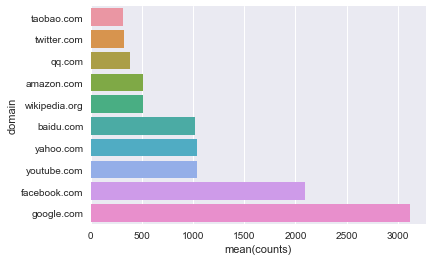

In [5]:
# Place your code here
domains = c.groupby(['domain']).size().reset_index(name='counts')
domains = domains.sort_values(by='counts')
sns.barplot(x='counts',y='domain',data=domains)



4\. List all records for the user with user id 37. (hint: this can be done using 'grep')

In [6]:
# Place your code here
c[c.userid==37]

,userid,timestamp,domain,action
2517,37,648061658,google.com,0
2992,37,642479972,google.com,2
3321,37,644493341,facebook.com,2
3731,37,654941318,facebook.com,1
4823,37,649979874,baidu.com,1
5133,37,653061949,yahoo.com,1
6080,37,655020469,google.com,3
6550,37,640878012,amazon.com,0
7721,37,659864136,youtube.com,1
8693,37,640361378,yahoo.com,1


### Part 3: Dealing with data Pythonically

In [7]:
# You might find these packages useful. You may import any others you want!
import pandas as pd
import numpy as np

1\. Load the data set `"ads_dataset.tsv"` into a Python Pandas data frame called `ads`.

In [8]:
# Place your code here
ads = DataFrame.from_csv('ads_dataset.tsv', sep='\t', header=0)
#t.describe()
ads.describe()



,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54584.000000,2327.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000
mean,0.042632,1.240653,1.852777,0.210008,5.825610,-0.198040,-10.210786,64.729335,64.729335,0.006357,0.277444,86.569343,720.657592,0.004635
std,0.202027,0.782228,2.921820,3.922016,17.595442,4.997792,31.879722,53.476658,53.476658,0.079479,0.447742,61.969765,1275.727306,0.067924
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.104167,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,802.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


2\. Write a Python function called `getDfSummary()` that does the following:
- Takes as input a data frame
- For each variable in the data frame calculates the following features:
  - `number_nan` to count the number of missing not-a-number values
  - Ignoring missing, NA, and Null values:
    - `number_distinct` to count the number of distinct values a variable can take on
    - `mean`, `max`, `min`, `std` (standard deviation), and `25%`, `50%`, `75%` to correspond to the appropriate percentiles
- All of these new features should be loaded in a new data frame. Each row of the data frame should be a variable from the input data frame, and the columns should be the new summary features.
- Returns this new data frame containing all of the summary information

Hint: The pandas `describe()` [(manual page)](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) method returns a useful series of values that can be used here.

In [53]:
def getDfSummary(input_data):
    # Place your code here
    #https://stackoverflow.com/questions/26266362/how-to-count-the-nan-values-in-the-column-in-panda-data-frame
    adict={}
    for col in input_data:
        adict[col]=input_data.value_counts()
        return DataFrame(adict,index=['% of Missing'],columns=adict.keys())
        
        
        #number_nan = input_data[column].isnull().sum()
        #number_distinct = input_data[col].groupby(col).size()
        
        #summ = pd.concat([number_nan],axis=1)
        #return summ
       # return numb
        #print(column)
        #number_nan=input_data[column].isnull().sum()
        #number_nan=pd.DataFrame(number_nan)
        #number_distinct =pd.DataFrame(input_data[column].nunique())
        #summ =pd.concat([number_nan,number_distinct],axis=1)
        #print(input_data[column].isnull())
        #print(number_nan,number_distinct)
       # print(type(number_nan))
        #print(number_nan);
        #return number_nan
        #np.concatenate([number_nan,number_distinct],axis=1)
        #df = pd.DataFrame(number_nan,columns=list(column))
    
#ads.head()
#ads.columns[1]





In [54]:

u = ads['buy_interval'].nunique()#;type(u)
u

n = ads['buy_interval'].isnull().sum()
n


0

3\. How long does it take for your `getDfSummary()` function to work on your `ads` data frame? Show us the results below.

Hint: `%timeit getDfSummary(ads)`

In [55]:
# Place your code here
#ads.columns


getDfSummary(ads);
#ads.head()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

4\. Using the results returned from `getDfSummary()`, which fields, if any, contain missing `NaN` values?

In [ ]:
# Place your code here

5\. For the fields with missing values, does it look like the data is missing at random? Are there any other fields that correlate perfectly, or predict that the data is missing? If missing, what should the data value be?

Hint: create another data frame that has just the records with a missing value. Get a summary of this data frame using `getDfSummary()` and compare the differences. Do some feature distributions change dramatically?

In [ ]:
# Place your code here

6\. Which variables are binary?

In [ ]:
# Place your code here